# Disruptive Technology and Social Impact
## Climate Change Data Visualization and [Basic] Machine learning
By Justin Wong

### This will be dense, so I'll make it interactive.

### What We'll Go Cover
1. Imports
2. Using Real Data from Credible Sources
3. Parsing through the Data
4. Creating Purposeful Charts
5. Deriving Simple Linear Regression Line from the Data
6. Steps Going Forward


### Objectives:

#### Imports:
* Make sure you have all your imports installed.
    - Anything that isn't installed you can run `pip install`
* You import libraries because there are other functions created out there already that you can use.
* Before coding something up, check to see if the wheel is already invented.

#### Data from Credible Sources:
* There is A TON of data and picking the correct data, may seem obvious, but don't forget to check your sourcs, as with anything else. 

####  Parsing through Real Data:
* See what raw data looks like and how messy it may look initially.
* Understand that there are libraries that exist to help you create order from the mess.
     - Cleaning data is the more tedious and least fun part of data visualization and machine learning.
* In order for you to use the data, you need to keep track of what you're looking at.

#### Creating Purposeful Charts
* Graph charts that look nice and clearly show what you're trying to show.

#### Deriving Simple Linear Regression Line from the Data
* Machine learning is about minimizing the error between actual and experimental data.

#### Steps Going Forward


## 1. Imports
To get started we need to do imports! Why?
* Other libraries have done work already.... Why reinvent the wheel?
* Makes work much more productive and save yourself time

In [13]:
## Fun imports!
import sys
import os
import zipfile

## Plotting libraries
import pandas as pd   # Dataframes and Series are basically 2d and 1d tables 
import matplotlib.pyplot as plt
import seaborn as sns

## Library for creating vectors and linear algebra manipulation
## For Least Squares
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Used for reading files. ds100_utils is from Data 100
from ds100_utils import * 

## Imports from ds100_utils
import requests
from pathlib import Path
import time 

## 2. Getting Started with NOAA Climate Data
NOAA is the **National Oceanic and Atmospheric Administration** under the US Department of Commerce. They essentially monitor the entire earth:
* Carbon emissions throughout different regions in the world
* Ocean levels
* Ocean temperatures
* Ocean and wind currents
* Pollution, etc.

We'll look at `CO2 Emmissions` data from two different sources.

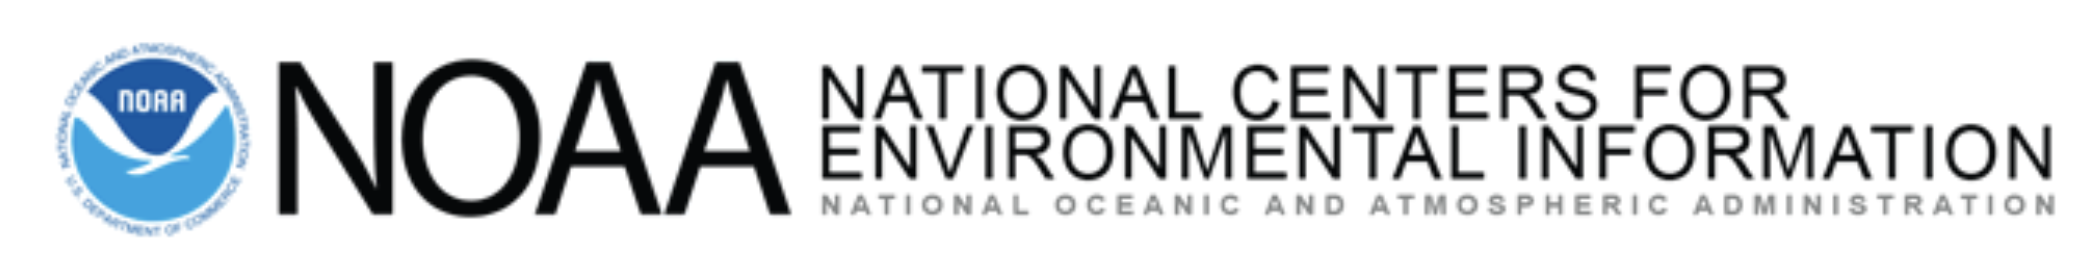

## Data Sources and Files
Data comes in many different formats:
* csv
* xml
* json
* xls 

# Fetching Your Data
The hardest part is fetching and cleaning your data. Make sure your sources are providing credible data points. Stick with governmental data to be on the safe side.

### Climate Data Sources
- https://edgar.jrc.ec.europa.eu/overview.php?v=42

### Cool visualizations on 
- https://www.esrl.noaa.gov/gmd/ccgg/trends/mlo.html



### Inspired by (A global dataset of CO2 emissions and ancillary data related to emissions for 343 cities):
- https://www.nature.com/articles/sdata2018280#data-citations

## 3. Let's Get Started: Parsing through CO2 Emissions

In [14]:
# Set up your sources and destination locations to download data from somewhere to somewhere on your computer
# Emissions by country and main source category

source_data_url = 'https://edgar.jrc.ec.europa.eu/download.php?edgar_dst=65163'
target_file_name = 'data.zip'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = fetch_and_cache(
    data_url=source_data_url, 
    data_dir='.', 
    file=target_file_name, 
    force=False)



Using cached version that was downloaded (UTC): Sun Oct 20 00:53:20 2019


In [15]:
from pathlib import Path

# Create zip file (this does the actual download)
my_zip = zipfile.ZipFile(fetch_and_cache(source_data_url, target_file_name), 'r')


## Look at the size of each file.
## Do you really want all these files downloaded to your laptop?
file_names_and_size = [(info.filename, info.file_size) for info in my_zip.infolist()]
# file_names_and_size # UNCOMMENT to view the contents of file_names_and_size

## Set up your destination path (on your laptop) and download into foldre
data_dir = Path('data')
my_zip.extractall(data_dir)     # downloads into a folder called "data"



Using cached version that was downloaded (UTC): Sun Oct 20 00:54:06 2019


In [16]:
!ls data

data.zip                     v4.2_CH4_1990.csv
v4.2_CH4_1970.csv            v4.2_CH4_1991.csv
v4.2_CH4_1971.csv            v4.2_CH4_1992.csv
v4.2_CH4_1972.csv            v4.2_CH4_1993.csv
v4.2_CH4_1973.csv            v4.2_CH4_1994.csv
v4.2_CH4_1974.csv            v4.2_CH4_1995.csv
v4.2_CH4_1975.csv            v4.2_CH4_1996.csv
v4.2_CH4_1976.csv            v4.2_CH4_1997.csv
v4.2_CH4_1977.csv            v4.2_CH4_1998.csv
v4.2_CH4_1978.csv            v4.2_CH4_1999.csv
v4.2_CH4_1979.csv            v4.2_CH4_2000.csv
v4.2_CH4_1980.csv            v4.2_CH4_2001.csv
v4.2_CH4_1981.csv            v4.2_CH4_2002.csv
v4.2_CH4_1982.csv            v4.2_CH4_2003.csv
v4.2_CH4_1983.csv            v4.2_CH4_2004.csv
v4.2_CH4_1984.csv            v4.2_CH4_2005.csv
v4.2_CH4_1985.csv            v4.2_CH4_2006.csv
v4.2_CH4_1986.csv            v4.2_CH4_2007.csv
v4.2_CH4_1987.csv            v4.2_CH4_2008.csv
v4.2_CH4_1988.csv            v4.2_CH4_tot_1970_2008.xls
v4.2_CH4_1989.csv            v42_CH4_sectors_overvi

In [17]:
file_names_and_size.sort()
years_tracked = len(file_names_and_size) - 3
years_tracked = 1

dfYearLookup = {}

with my_zip as zip:
    ## include splicing on `file_names_and_size` to select only certain years
    for file_size_pair in file_names_and_size[:years_tracked]:
        fn = file_size_pair[0]
        fnpath = "data/" + fn
        print(fn)
        
        cols = [i for i in range(61)]
        # Other libraries are made for these reasons.
        yearEmmissions = pd.read_csv(fnpath, skiprows=11, header=None, usecols=cols)  
        ## Notice that there are currently no column names.
#         display(yearEmmissions)     ##########
        
        
        
        # Extract the contents of the file into a list of the contents of yearTextualized.
        yearTextualized = whole_ISO(fnpath)
#         # Uncomment below to show yearTextualized neatly.
#         rowNum = 0
#         for r in yearTextualized:
#             row = r.split(',')
#             print(rowNum, " row has length: ", len(row))
#             print(row)
#             print()
#             rowNum+=1
        
    
        # From our observations about our data, first 10 columns, we'll call out `header`
        ## Actual data is the 11 through 61 columns
        header = yearTextualized[:11]
        data = yearTextualized[11:]
        
        # Uncomment below to see the contents of data.
#         dataRowNum = 12
#         for r in data:
#             if (dataRowNum != 246):
#                 row = r.split(',')[0:61]
#                 print(dataRowNum, ": ", len(row), row)
#                 print()
#             dataRowNum+=1

    
        ## From our header, we had some information about the vertical columns. 
        # We want to combine the somehow "merge" the two.
#         print("Row 8: ", header[8])
#         print("Row 10: ", header[10])
        
        ## Get titles from line 8 in the csv file and clean the quotes
        # Clean up quotes by getting rid of first and last literals/characters in the entire string
        colsTitles = header[8].split(',')[0:61] # convert the string into list split by delimiter
        colsTitles = [title[1:len(title) - 1] for title in colsTitles] # convert list to string array for column titles
        colsNum = header[10].split(',')[0:61] # convert values columns into list using ',' deelimiter
        
        
        ## Merge the two xcel column titles
#         print("Before Merge: ", colsTitles) ##########
#         print()
        for i in [0,1,2]:
            title = colsNum[i]
            colsTitles[i] = str(title[1:len(title) - 1])
        colsTitles[60] = colsNum[60][1:len(colsNum[60])-3]
        # See the difference?
#         print("After Merge: ", colsTitles)  ##########
    
    
        ## View current status of dataframe
#         display(yearEmmissions)     ##########
        
        ## We want out column names to be representative of those numbers. 
        yearEmmissions.columns = colsTitles
        ## Print each column
#         for col in yearEmmissions.columns:
#             print(col)

        ## View current status of dataframe after setting the columns to our list of column names
#         display(yearEmmissions)     ##########
        
        
        ## ALL THE ABOVE WAS MINIMAL PARSING. 
        ## Now, in order for us to continue, we want to keep track of all the different years
        ## since we have 1970 through 2008.
        
        # First, let's find year and topic from the header
#         print(header)
        yearParse = header[2].split(',')
        entryYear = yearParse[1]
        year = entryYear[1:len(entryYear)-2]
        
        topicParse = header[0].split(',')
        entryContent = topicParse[1]
        content = entryContent[1:len(entryContent)-3]
        
        ## Create new column for year
        yearEmmissions['year'] = year
        
        
        # Store in our dictionary for quick look
        dfYearLookup[year] = yearEmmissions.sort_values(by='TOTAL', ascending=False)
        
        # View the entire dataframe
        print(content, " from ", year)
#         display(dfYearLookup[year])     ##########
        
        

v4.2_CH4_1970.csv
Emissions by country and main source category  from  1970


In [6]:
## Someone give me a year between 1970 and 2007
years = dfYearLookup.keys()
print(years)

selectedYear = '1975'
# dfYearLookup[selectedYear]

dict_keys(['1970'])


## Emissions by country and main source category  from  1970 - 2007

#### Features/Characteristics about our `yearTextualized`:
* Header is in the first 10 rows (Contains info Content, compound, year, unit of measureement, source, etc.)
* Row 8 has descriptive column titles.
* Row 10 looks like the vertical column names on xcel 
* Data begins from Row 11 with Canada
* Row 245 is blank
* Row 246 is a summmary (TOTAL row
* Values are in scientific notation

#### Features/Characteristics about our `data`:
* Everything is a string, including the number values
* The numbers are ein scientific notation

#### Features/Characteristics about our `header`:
* Details about each of the csv files.
* Includes Content("Emissions by country and main source category"), year, 

#### Features/Characteristics about our `yearPD`:
* Our temporary dataframe for the current year
* This data fram includes all the countries and main source categories, as well as a year column.

#### Features/Characteristics about our `dfYearLookup`:
* Our dictionary to find all the dataframes that we've created from the csv files
* This will keep track of our dataframes all in one place

In [7]:
## China's Carbon Emissions by activities/sources in 1970
seventyOne = dfYearLookup['1970']
seventyOne


,World Region,ISO_A3,Country,Public electricity and heat production,Other Energy Industries,Manufacturing Industries and Construction,Domestic aviation,Road transportation,Rail transportation,Inland navigation,...,Solid waste disposal on land,Wastewater handling,Waste incineration,Other waste handling,Fossil fuel fires,Indirect N2O from non-agricultural NOx,Indirect N2O from non-agricultural NH3,Other sources,TOTAL,year
234,TOTALS,NaN,NaN,36.651000,18.367400,257.707000,1.131960e+00,823.953000,9.281690,8.747440,...,16177.900000,15369.600000,289.131000,0.670668,145.02,0,0,0,252658.000000,1970
185,China +,CHN,China,0.892619,0.245306,36.105600,0.000000e+00,5.475400,0.536664,0.000000,...,358.213000,3408.200000,2.347050,0.000000,90.00,0,0,0,37194.700000,1970
3,USA,USA,United States,10.603100,8.516490,72.417900,9.257010e-01,499.192000,2.227850,1.339940,...,6236.530000,556.210000,0.000000,0.000000,15.00,0,0,0,28297.800000,1970
177,India +,IND,India,0.284477,0.122869,4.340790,0.000000e+00,5.725950,0.745020,0.087337,...,224.160000,1994.140000,0.000000,0.000000,39.42,0,0,0,18962.500000,1970
160,Russia +,RUS,Russian Federation,5.177600,0.907552,13.439600,0.000000e+00,19.985100,1.649290,2.440370,...,590.429000,762.789000,0.000000,0.000000,0.00,0,0,0,16118.800000,1970
37,Brazil,BRA,Brazil,0.213206,0.186649,10.177000,1.718680e-02,11.868400,0.105824,0.196653,...,169.531000,748.691000,2.541860,0.000000,0.00,0,0,0,9892.240000,1970
113,OECD_Europe,DEU,Germany,3.382440,0.807501,11.449300,9.629630e-04,31.514000,0.433990,0.257907,...,1302.520000,218.525000,0.000000,0.000000,0.00,0,0,0,6032.970000,1970
200,Indonesia +,IDN,Indonesia,0.016936,0.062301,0.208628,2.030590e-03,2.233980,0.002596,0.011723,...,86.464500,496.087000,1.195130,0.000000,0.00,0,0,0,6031.660000,1970
119,OECD_Europe,GBR,United Kingdom,1.362740,0.538974,9.461650,3.054270e-02,24.841500,0.219596,0.331762,...,2058.650000,123.976000,11.754900,0.000000,0.00,0,0,0,5716.860000,1970
64,Western_Africa,COD,Congo_the Democratic Republic of the,0.000000,0.001633,0.083694,0.000000e+00,0.160348,0.000000,0.000000,...,24.029900,87.516200,0.000000,0.000000,0.00,0,0,0,5694.420000,1970


In [12]:
china70 = seventyOne[seventyOne['Country']=='China']

## Extract the top 10 categories from 1970
china70Stacked = china70.stack()[3:61]
sortedChina70 = china70Stacked.sort_values(axis=0, ascending=False)
topTen = sortedChina70[:11].unstack()
categories = topTen.columns

print(categories)

Index(['TOTAL', 'Rice cultivation', 'Enteric fermentation',
       'Fugitive emissions from solid fuels', 'Wastewater handling',
       'Residential and other sectors', 'Manure management',
       'Solid waste disposal on land', 'Fugitive emissions from oil and gas',
       'Fossil fuel fires', 'Grassland fires'],
      dtype='object')


## 3. Purposeful Plots
We plot to reveal something about our data. But instead of diving straight into it, start with something you want to find out. **What are some questions you might have about climate data? **
* ...

To get started, let's go with 
- How has the top 10 carbon emmission activities from the 1970s changed over time? 
- Are we able to find some correlation with the top 10 carbon emitters and increasd chances of that being reduced and is this the same across multiple countries?

In [ ]:
# We will track the top 10(including overall total) from 1970 to 2007.
# To generalize, we can do this for any country. 
country = 'United States'
bigDF = [] ## List that will continously be built to each of the rows in our dataframe

for year in years:
    df = dfYearLookup[year]
    row = {}
    row['Year'] = year
    dataRow = df[df['Country']==country]
    
    ## Extract the top 10 categories from the year
    countryYearStacked = dataRow.stack()[3:61]
    sortedStack = countryYearStacked.sort_values(axis=0, ascending=False)
    topTen = sortedStack[:11].unstack()
    categories = topTen.columns
    
    for cat in categories:
        match = df[df['Country']==country][cat]
#         print(cat, " : ",  match.values)
#         print()
        row[cat] = match.values[0]
        
        
    bigDF.append(row)
#     print()
#     print()

bigDF[0]
bigDF = pd.DataFrame(bigDF)
bigDF.head()

In [ ]:
# # Plotting on a scatter plot of the top 10 carbo emitters from 1970 tracked over time
plt.figure(figsize=(15, 9))
sns.set_style("whitegrid")
sns.set_style({"xtick.major.size":30, "ytick.major.size":12})

## if TOTAL is included, we have a big axis gap.
for cat in categories:
    if (cat != "TOTAL" ):
        sns.lineplot(x='Year', y=cat, data=bigDF, label=cat)
        
for year in years:
    df = dfYearLookup[year]
    row = {}
    row['Year'] = year
    dataRow = df[df['Country']==country]
    
    ## Extract the top 10 categories from the year
    countryYearStacked = dataRow.stack()[3:61]
    sortedStack = countryYearStacked.sort_values(axis=0, ascending=False)
    topTen = sortedStack[:11].unstack() ## change 11 to some other vlaue 
    categories = topTen.columns
    
    for cat in categories:
        match = df[df['Country']==country][cat]
#         print(cat, " : ",  match.values)
#         print()
        row[cat] = match.values[0]


plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel("C02 Emmissions Measured in Mt")
plt.title(country + "'s Top 10 from 1970 until 2007")
plt.legend(loc="center left")


### Plots
There are many different kinds of plots that we could've used.
See https://seaborn.pydata.org/tutorial/axis_grids.html

## 4. Simple Linear Regression Line (Least Squares)
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

From our previous chart, `Solid waste disposal on land` seemed pretty interestingn because it rose up until 1990, then had a relatively steep drop after. Let's try to create a prediction line for that.

Least squares is essentially trying to find a best fit model to minimize the total difference between the line we are to find and our actual data points. We minimize the squares of this exact function. This translates to the following equation: 

[THIS IS A HUGE OVERSIMPLIFICATION] Equations boil down to:

$$a_1x = b_1 + e_1$$

$$a_2x = b_1 + e_2$$

$$a_3x = b_1 + e_3$$

$$a_4x = b_1 + e_4$$

For our purposes, we have these `a` and `b` variables:
$$a_{1970}x = b_{1970} + e_{1970}$$

$$a_{1971}x = b_{1971} + e_{1971}$$

$$ . $$

$$ . $$

$$a_{2007}x = b_{2007} + e_{2007}$$

$\overrightarrow{x}$ is our prediction model

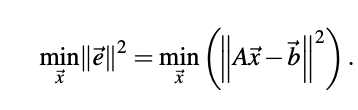

Where 
- $\overrightarrow{e}$ is the error we want to minimize
- ${A}$ is our actual data
- ${B}$ is the "noise"



In [ ]:
bigDF.head()

In [ ]:

solid_waste_disposal_on_land = bigDF['Solid waste disposal on land']
year_associated = bigDF['Year']

# display(solid_waste_disposal_on_land)
# display(year_associated)

## We first create a function, that takes in a year in our range and outsides the corresponding data
def solid_waste(year):
    ind = int(year) - 1970
    return bigDF['Solid waste disposal on land'][ind]

solid_waste('1971')


In [ ]:

## Transform our current data types from stringa to year integers and data floats
years_int = [int(y) for y in year_associated]
solid_waste_disposal_on_land_float = [float(s) for s in solid_waste_disposal_on_land]

ax = sns.regplot(x=years_int, y=solid_waste_disposal_on_land_float, marker='+' )
plt.title("Regression line on " + country + "'s prediction on Solid Waste Disposal on Land'")
plt.ylabel("CO2 by Mt")
plt.xlabel("Year")



In [ ]:

source = bigDF['TOTAL']
year_associated_with_source = bigDF['Year']

## Transform our current data types from stringa to year integers and data floats
years_int = [int(y) for y in year_associated_with_source]
source_float = [float(s) for s in source]

ax = sns.regplot(x=years_int, y=source_float, marker='+' )
plt.title("Regression line on " + country + "'s prediction on TOTAL'")
plt.ylabel("CO2 by Mt")
plt.xlabel("Year")


## Back to our Original Question
- How has the top 10 carbon emmission activities from the 1970s changed over time? 
- Are we able to find some correlation with the top 10 carbon emitters and increasd chances of that being reduced and is this the same across multiple countries?



## Machine Learning Going Forward
#### ML at the core is limiting this error to make predictions as accurate as possible.

Techniques involve regression(what we did), clustering(grouping), neural networks, transfer learning, reinforcement learning. There are plenty of resources that can be found online.

Just as an example, 
* "How to build an image classifier for waste sorting" on https://towardsdatascience.com/how-to-build-an-image-classifier-for-waste-sorting-6d11d3c9c478
* 

## Other datasets:
We also have the following shets from the EU, tracking fossil_C02 by a variety of different measurements.
Initially, the data is from an excel sheet. 

**Megatons and tons**
* `1970-2017` | values in `fossil_CO2_totals_by_country` sheet are expressed in `Mt CO2/yr`
* `1970-2017` | values in `fossil_CO2_by_sector_and_country` sheet are expressed in `Mt CO2/yr`	
* `1990-2017` | values in `fossil_CO2_per_GDP_by_country` sheet are expressed in `t CO2/kUSD/yr`							timeseries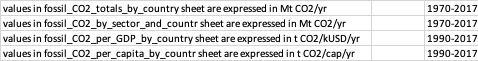

In [ ]:
total_by_country = 'fossil_CO2_totals_by_country.csv'

countryTotal = pd.read_csv(total_by_country) 
countryTotal.head()


In [ ]:
fossil_CO2_by_sector_and_country = 'fossil_CO2_by_sector_and_country.csv'

sector_and_country = pd.read_csv(fossil_CO2_by_sector_and_country) 
sector_and_country['Sector'].unique()
sector_and_country.head()

In [ ]:
fossil_CO2_per_GDP_by_country = 'fossil_CO2_per_GDP_by_country.csv'

GDP_per_country = pd.read_csv(fossil_CO2_per_GDP_by_country) 
GDP_per_country.head()

In [ ]:
## Someone give me a country to see the total C02 from that country
country = "China"
countryTotal[countryTotal['country_name'] == country]

In [ ]:
## This will find the top 5 in a particular year
particularYear = "1970"
countryTotal.sort_values(by=particularYear, ascending=False)

### Finding the Country with the Max C02 Emissions Every Year
We first need to figure out who has been the top contributor. 

From the data, the US has been leading the world in CO2 emissions, but then after 2005, China's emissions become greater. From the table itself, we only see the numbers. Let's try looking at a chart! 

In [ ]:
# Can do more complicated tasks, i.e. finding the country with the max C02 emissions every year
top = []
for seri in countryTotal.columns[1:]:
    s= {}
    s['year'] = seri
    s['country_name'] = countryTotal.sort_values(by=seri, ascending=False)['country_name'].iloc[1]
    s['Country with Most C02 Emissions [Mt]'] = countryTotal.sort_values(by=seri, ascending=False)[seri].iloc[1]
    top.append(s)

top = pd.DataFrame.from_dict(top).set_index('year')
top

In [ ]:
# Can compare betweeen China and the US
china = countryTotal[countryTotal['country_name']=='China'].stack()
us = countryTotal[countryTotal['country_name']=='United States'].stack()

# us
joined = pd.merge(china.rename('China'), us.rename('US'), left_on=china.index.levels[1], right_on=us.index.levels[1])
joined = joined.rename(columns={'key_0':'year'}).drop(0)
# joined.rename(columns={'key_0':'year'}).set_index('year').drop('country_name')

In [ ]:
## Plotting on a scatter plot
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.set_style({"xtick.major.size":30, "ytick.major.size":12})

usX = sns.scatterplot(x='year', y='US', data=joined, legend="full").set_label('US')
chinaX = sns.scatterplot(x='year', y='China', data=joined, legend="full").set_label('China')

plt.xlabel('Year')
plt.ylabel('Annual C02 Emissions by Mt')
plt.title('China vs US C02 Emissions in Mt from 1970 to 2017')
plt.legend(['US', 'China'])
locs, labels = plt.xticks(rotation=70, fontsize = 15)
# usX.set_xticklabels(rotation=90)

In [ ]:
## If we wanted to compare a few countries all together, we can plot that too and see how they compare with each other.
g = "GLOBAL TOTAL" 
o = 'China'
t = 'Poland'
th = 'India'

globe = countryTotal[countryTotal['country_name']==g].stack()
one = countryTotal[countryTotal['country_name']==o].stack()
two = countryTotal[countryTotal['country_name']==t].stack()
three = countryTotal[countryTotal['country_name']==th].stack()

# us
joinedOne = pd.merge(one.rename(o), two.rename(t), left_on=one.index.levels[1], right_on=two.index.levels[1])
joinedTwo = pd.merge(globe.rename(g), three.rename(th), left_on=globe.index.levels[1], right_on=three.index.levels[1])

joinedOne = joinedOne.rename(columns={'key_0':'year'}).drop(0)
joinedTwo = joinedTwo.rename(columns={'key_0':'year'}).drop(0)
# joined.rename(columns={'key_0':'year'}).set_index('year').drop('country_name')
display(joinedOne)
display(joinedTwo)

In [ ]:
## Plotting on a scatter plot
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")
sns.set_style({"xtick.major.size":30, "ytick.major.size":12})

gp = sns.scatterplot(x='year', y=g, data=joinedTwo, legend="full").set_label(g)
op = sns.scatterplot(x='year', y=o, data=joinedOne, legend="full").set_label(o)
tp = sns.scatterplot(x='year', y=t, data=joinedOne, legend="full").set_label(t)
thp = sns.scatterplot(x='year', y=th, data=joinedTwo, legend="full").set_label(th)

plt.xlabel('Year')
plt.ylabel('Annual C02 Emissions by Mt')
plt.title('Comparable Countries C02 Emissions in Mt from 1970 to 2017')
plt.legend([g, o, t, th])
locs, labels = plt.xticks(rotation=70, fontsize = 15)
# usX.set_xticklabels(rotation=90)

# Steps Going Forward:
## Disruptive Tech + Social Impact Teams Currently [Ideas submitted]:
- #### Transporting Food Platform + Blockchain for Voting
- #### Donor-Nonprofit matching platform + Clothing Classifier for Recycling Clothes 
- #### Emotion Management + Personal Networking Assistant
- #### Recycle Vending machines/app + Animal Encroachment
- #### Free Speech Video Sharing Platform + Volunteering App
- #### Tracking Food Waste +  Crowdsourced Funding Platform
- #### Blockchain Debt Tracking/Market + [Prescription]Buddy
- #### Blockchain verification for student admissions + VR classrooms



**********************




# Trash Classifier with Transfer Learning
### How to build an image classifier for waste sorting" on https://towardsdatascience.com/how-to-build-an-image-classifier-for-waste-sorting-6d11d3c9c478

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import random

In [ ]:
dsTrashFiles = zf.ZipFile("dataset-resized.zip", 'r')
data_dir = Path('trashData')
dsTrashFiles.extractall(data_dir)
dsTrashFiles.close()

In [ ]:

# os.listdir(os.path.join(os.getcwd(),"dataset-resized"))
pathToTrash = Path(os.getcwd())/"trashData"/"dataset-resized"

In [ ]:
pathToTrash
# tfms = get_transforms(do_flip=True, flip_vert=True)
# trashD = ImageDataBunch.from_folder(pathToTrash, test="test", ds_tfms=tfms, bs=16)
!ls trashData/dataset-resized


In [ ]:
## helper functions ##

## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [ ]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join(pathToTrash,subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join(pathToTrash,'test')):
    os.makedirs(os.path.join(pathToTrash,'test'))
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join(pathToTrash,waste_type)
#     print(source_folder)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = str(pathToTrash)+"/train/"+waste_type
    move_files(train_source_files, train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = str(pathToTrash)+"/valid/"+waste_type
    move_files(valid_source_files, valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    test_dest = str(pathToTrash)+"/test/"+waste_type
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files, test_dest)
    
    

In [ ]:
## get a path to the folder with images
trashDataPath = Path(os.getcwd())/"trashData/dataset-resized"
trashDataPath

In [ ]:
tfms = vision.get_transforms(do_flip=True,flip_vert=True)
trashD = ImageDataBunch.from_folder(trashDataPath,test="test",ds_tfms=tfms,bs=16)
trashD

In [ ]:
print(trashD.classes)

In [ ]:
# trashD.show_batch(rows=2,figsize=(10,8))

In [ ]:
learn = cnn_learner(trashD,models.resnet34,metrics=error_rate)


In [ ]:
## Details about the learn cnn
learn.model

In [ ]:
## Begin Learning
learn.lr_find?
learn.lr_find(start_lr=1e-6,end_lr=1e1, num_it=1)
learn.recorder.plot()

In [ ]:

learn.fit_one_cycle(20,max_lr=5.13e-03)
